# Comparing EM with GD for Gaussian mixtures (initialized from a one-cluster point)

In [7]:
## choosing parameters for mixture of gaussians
import numpy as np
m = n = 2
gPi = np.random.rand(m)
gPi = gPi / np.sum(gPi)
gMu = np.random.rand(m, n)
gMu[1] = -gMu[0]

In [8]:
# choosing the number of samples
samples = 10000
data = np.zeros((samples, 2))
# sampling from the generating distribution
for _ in range(samples):
    t = np.random.rand()
    if t < gPi[0]:
        data[_] = np.random.multivariate_normal(gMu[0], np.eye(n), 1)
    else:
        data[_] = np.random.multivariate_normal(gMu[1], np.eye(n), 1)

In [9]:
# def a multivariate gaussian with identity covariance
def gaussian(x, y, n):
    result = 1.0
    for _ in range(n):
        result *= np.exp(-(x[_] - y[_])**2/2.0)
    return result

In [4]:
# def a mixture of Gaussians
def gmm(pi, Mu, x, m, n):
    result = 0.0
    for _ in range(m):
       result += pi[_] * gaussian(x, Mu[_], n)  
    return result

In [10]:
# initial parameters
iPi = np.array([0.0001, 0.9999])
iMu = (np.random.rand(m, n) * 2 - 1)
# running parameters
Pi = np.copy(iPi)
Mu = np.copy(iMu)

## EM algorithm

In [11]:
# number of iterations
iteration = 100 
loss = np.zeros(iteration)
pis = np.zeros(iteration)
# Zc is the partition function vector
for itts in range(iteration):
    # compute Z_c and E_{q_c}[x]
    Zc = np.zeros(m)
    Zcx = np.zeros((m, n))
    for c in range(m):
        for i in range(samples):
            x = data[i]
            Zcx[c] += np.multiply(x, (gaussian(x, Mu[c], n) / gmm(Pi, Mu, x, m, n)))
            Zc[c] += (gaussian(x, Mu[c], n) / gmm(Pi, Mu, x, m, n))
    Zc /= samples
    Zcx /= samples
    # update parameters
    print("Zc: ", Zc, "Pi: ", Pi)
    for _ in range(m):
        Pi[_] *= Zc[_]
        Mu[_] = Zcx[_] / Zc[_]
    pis[itts] = Pi[0]
    cross_entropy = 0.0
    for i in range(samples):
        x = data[i]
        cross_entropy += -np.log(gmm(Pi, Mu, x, m, n))
    cross_entropy /= samples
    loss[itts] = cross_entropy

Zc:  [2.46015361 0.99985397] Pi:  [1.000e-04 9.999e-01]
Zc:  [1.08957991 0.99997796] Pi:  [2.46015361e-04 9.99753985e-01]
Zc:  [1.39188941 0.99989492] Pi:  [2.68053396e-04 9.99731947e-01]
Zc:  [2.65491601 0.99938232] Pi:  [3.73100683e-04 9.99626899e-01]
Zc:  [3.42516745 0.99759537] Pi:  [9.90550975e-04 9.99009449e-01]
Zc:  [2.3917192 0.9952621] Pi:  [0.0033928 0.9966072]
Zc:  [1.99711406 0.99184259] Pi:  [0.00811463 0.99188537]
Zc:  [1.7477534  0.98768241] Pi:  [0.01620585 0.98379415]
Zc:  [1.56211932 0.98361453] Pi:  [0.02832382 0.97167618]
Zc:  [1.42698177 0.98023354] Pi:  [0.04424519 0.95575481]
Zc:  [1.33079955 0.97770675] Pi:  [0.06313708 0.93686292]
Zc:  [1.26228887 0.97594018] Pi:  [0.0840228 0.9159772]
Zc:  [1.21249678 0.9747884 ] Pi:  [0.10606104 0.89393896]
Zc:  [1.17533128 0.97412516] Pi:  [0.12859867 0.87140133]
Zc:  [1.14686633 0.97384914] Pi:  [0.15114604 0.84885396]
Zc:  [1.12456552 0.97387942] Pi:  [0.1733443 0.8266557]
Zc:  [1.10675134 0.97415135] Pi:  [0.19493703 0.80

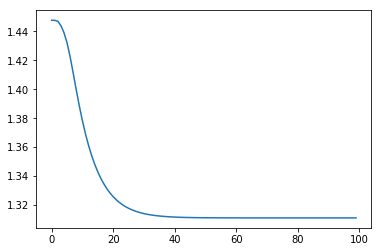

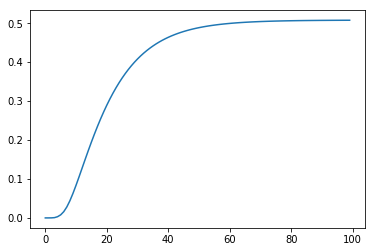

In [14]:
import matplotlib.pyplot as plt
plt.plot(loss)
plt.show()
plt.plot(pis)
plt.show()## EM algorithm

## GD algorithm

In [15]:
avg = np.mean(data, axis = 0)

In [21]:
import nbm
# go back to the same initialization
Pi = np.copy(iPi)
Mu = np.copy(iMu)
Mu[1] = avg
# set the step size
ss = 0.01
# number of iterations
iteration = 100
loss_gd = np.zeros(iteration)
pis_gd = np.zeros(iteration)
# Zc is the partition function vector
for itts in range(iteration):
    # compute Z_c and E_{q_c}[x]
    # the computations for Zc, Zcx are the same
    oldPi = np.copy(Pi)
    oldMu = np.copy(Mu)
    Zc = np.zeros(m)
    Zcx = np.zeros((m, n))
    for c in range(m):
        for i in range(samples):
            x = data[i]
            Zcx[c] += np.multiply(x, (gaussian(x, Mu[c], n) / gmm(Pi, Mu, x, m, n)))
            Zc[c] += (gaussian(x, Mu[c], n) / gmm(Pi, Mu, x, m, n))
    Zc /= samples
    Zcx /= samples
    # the only difference is in updating parameters
    for _ in range(m):
        Pi[_] += ss * Zc[_]
        Mu[_] += ss * oldPi[_] * ( (Zcx[_] / Zc[_]) - oldMu[_]) * Zc[_]
    # do the projection, no need to project Mu now
    Pi = nbm.project(Pi)
    # print (use it for debugging)
    print("Zc: ", Zc, "Pi: ", Pi)
    pis_gd[itts] = Pi[0]
    cross_entropy = 0.0
    for i in range(samples):
        x = data[i]
        cross_entropy += -np.log(gmm(Pi, Mu, x, m, n))
    cross_entropy /= samples
    loss_gd[itts] = cross_entropy

Zc:  [1.0805 1.    ] Pi:  [0.0005 0.9995]
Zc:  [1.0802 1.    ] Pi:  [0.0009 0.9991]
Zc:  [1.0799 0.9999] Pi:  [0.0013 0.9987]
Zc:  [1.0795 0.9999] Pi:  [0.0017 0.9983]
Zc:  [1.0792 0.9999] Pi:  [0.0021 0.9979]
Zc:  [1.0789 0.9998] Pi:  [0.0025 0.9975]
Zc:  [1.0786 0.9998] Pi:  [0.0029 0.9971]
Zc:  [1.0782 0.9998] Pi:  [0.0033 0.9967]
Zc:  [1.0779 0.9997] Pi:  [0.0037 0.9963]
Zc:  [1.0776 0.9997] Pi:  [0.0041 0.9959]
Zc:  [1.0773 0.9997] Pi:  [0.0044 0.9956]
Zc:  [1.0771 0.9997] Pi:  [0.0048 0.9952]
Zc:  [1.0768 0.9996] Pi:  [0.0052 0.9948]
Zc:  [1.0765 0.9996] Pi:  [0.0056 0.9944]
Zc:  [1.0762 0.9996] Pi:  [0.006 0.994]
Zc:  [1.076  0.9995] Pi:  [0.0064 0.9936]
Zc:  [1.0757 0.9995] Pi:  [0.0068 0.9932]
Zc:  [1.0754 0.9995] Pi:  [0.0071 0.9929]
Zc:  [1.0752 0.9995] Pi:  [0.0075 0.9925]
Zc:  [1.0749 0.9994] Pi:  [0.0079 0.9921]
Zc:  [1.0747 0.9994] Pi:  [0.0083 0.9917]
Zc:  [1.0745 0.9994] Pi:  [0.0086 0.9914]
Zc:  [1.0742 0.9994] Pi:  [0.009 0.991]
Zc:  [1.074  0.9993] Pi:  [0.0094 0.99

## Comparing the escape rate for EM and GD

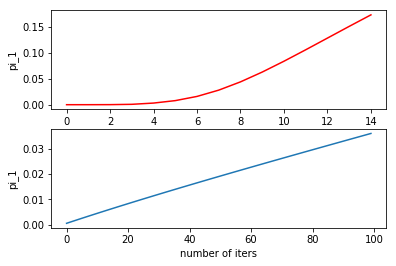

In [29]:
plt.subplot(211)
plt.xlabel("number of iters")
plt.ylabel("pi_1")
plt.plot(pis[:15], 'r')
plt.subplot(212)
plt.plot(pis_gd)
plt.xlabel("number of iters")
plt.ylabel("pi_1")
plt.savefig('em_vs_gd_gmm.png')
plt.show()## EM algorithm

In [26]:
plt.savefig('em_vs_gd_gmm.png')

<Figure size 432x288 with 0 Axes>